In [1]:
# %pip install matplotlib seaborn scipy matplotlib

### **Bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import poisson, nbinom
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### **Estatística e Machine Learning - QUESTÃO 2**

Um jogador frequente, leva um certo tempo entre o final de uma sessão de jogo e o início da outra.

A seguinte lista (dataset) contém esses tempos de espera (em dias).

**``dataset = [ 0, 1, 0, 2, 1, 2, 3, 2, 5, 15 ]``**


**Responder:**
- Qual é a distribuição paramétrica que melhor descreve a variável em questão, e por que?


- Descrever de maneira resumida o método utilizado para calcular os parâmetros da distribuição

<br>

O dataset é um conjunto discreto de dados. Avaliando dentre as distribuções discretas ``(Estudo\wilks2011.pdf):``


- Poisson

- Binomial

- Binomial Negativa

- Geométrica

<br>

O fato do conjunto de dados ser medido em tempo torna a de **Poisson** uma candidata, seguida pela **Binomial Negativa.**


- **Distribuição Poisson:**
    
    - Modela número de eventos que ocorrem em um intervalo fixo de tempo

    - Variância ≃ Média

    - Adequada para dados de contagem com dispersão moderada

- **Distribuição Binomial Negativa:**

    - Modela contagens de eventos com dispersão excessiva (superdispersão)

    - Variância > Média

    - Mais adequada quando há grande variabilidade nos dados

<br>

-------

<br>

O código abaixo torna a binomial negativa

Média: 3.10
Mediana: 2.00

Variância: 19.66
Desvio Padrão: 4.21

Assimetria: 2.57 - Assimetria positiva, cauda à direita


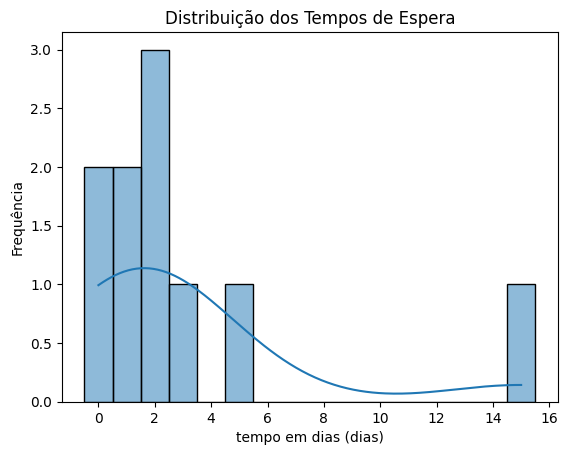

In [3]:
dataset = [ 0, 1, 0, 2, 1, 2, 3, 2, 5, 15 ]
dataset_df = pd.DataFrame(dataset, columns=['tempo em dias'])
dataset_df.sort_values(by=['tempo em dias'], inplace=True)


print(f'Média: {dataset_df['tempo em dias'].mean():.2f}')
print(f'Mediana: {dataset_df['tempo em dias'].median():.2f}')
print(f'\nVariância: {dataset_df['tempo em dias'].var():.2f}')
print(f'Desvio Padrão: {dataset_df['tempo em dias'].std(ddof=0):.2f}\n')

if dataset_df['tempo em dias'].skew() > 0:
    print(f'Assimetria: {dataset_df['tempo em dias'].skew():.2f} - Assimetria positiva, cauda à direita')

elif dataset_df['tempo em dias'].skew() < 0: 
    print(f'Assimetria: {dataset_df['tempo em dias'].skew():.2f} - Assimetria negativa, cauda à esquerda')

else:
    print(f'Assimetria: {dataset_df['tempo em dias'].skew():.2f} - A curva é simétrica')


sns.histplot(dataset, bins=10, kde=True, discrete=True)

plt.title('Distribuição dos Tempos de Espera')
plt.xlabel('tempo em dias (dias)')
plt.ylabel('Frequência')

plt.show()


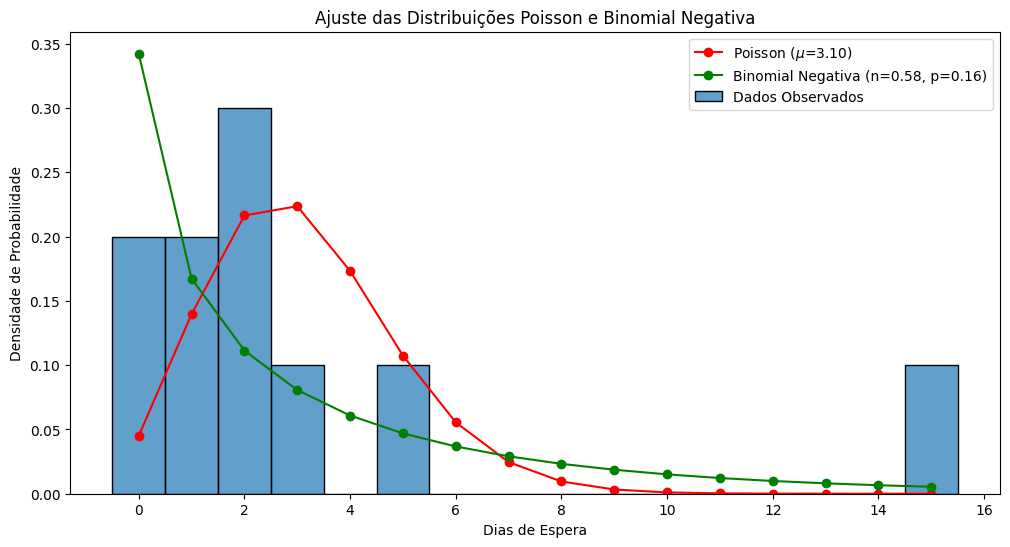


Comparação de Log-Likelihood (maior é melhor):
Poisson: -32.48
Binomial Negativa: -23.10
Melhor ajuste: Binomial Negativa


In [4]:
# Ajuste das distribuições

# Poisson
def fit_poisson(data):
    mu = np.mean(data)
    x = np.arange(0, np.max(data) + 1)
    pmf = poisson.pmf(x, mu)
    return x, pmf, mu

# Binomial Negativa
def fit_nbinom(data):
    
    mean = np.mean(data)
    var = np.var(data, ddof=1)
    n = (mean ** 2) / (var - mean) if var > mean else 1  # Evitar divisão por zero
    p = mean / var if var > 0 else 0.5
    x = np.arange(0, np.max(data) + 1)
    pmf = nbinom.pmf(x, n, p)
    return x, pmf, n, p

x_pois, pois_pmf, mu = fit_poisson(dataset_df['tempo em dias'])
x_nb, nb_pmf, n, p = fit_nbinom(dataset_df['tempo em dias'])

plt.figure(figsize=(12, 6))
sns.histplot(dataset_df['tempo em dias'], bins=np.arange(0, np.max(dataset_df['tempo em dias']) + 2) - 0.5, stat='density', discrete=True, alpha=0.7, label='Dados Observados')

plt.plot(x_pois, pois_pmf, 'ro-', label=fr'Poisson ($\mu$={mu:.2f})')
plt.plot(x_nb, nb_pmf, 'go-', label=fr'Binomial Negativa (n={n:.2f}, p={p:.2f})')

plt.title('Ajuste das Distribuições Poisson e Binomial Negativa')
plt.xlabel('Dias de Espera')
plt.ylabel('Densidade de Probabilidade')

plt.legend()
plt.show()

# Comparação de Log-Likelihood (quanto maior, melhor)
def log_likelihood(data, dist, params):
    if dist == 'poisson':
        return np.sum(poisson.logpmf(data, *params))
    elif dist == 'nbinom':
        return np.sum(nbinom.logpmf(data, *params))

ll_pois = log_likelihood(dataset_df['tempo em dias'], 'poisson', [mu])
ll_nb = log_likelihood(dataset_df['tempo em dias'], 'nbinom', [n, p])

print("\nComparação de Log-Likelihood (maior é melhor):")
print(f"Poisson: {ll_pois:.2f}")
print(f"Binomial Negativa: {ll_nb:.2f}")
print(f"Melhor ajuste: {'Binomial Negativa' if ll_nb > ll_pois else 'Poisson'}")

O ajuste da distribuição de Poisson mostra que valores extremos são subestimados

Ambas as distribuições se aproximação dos dados, porém a **``Binomial Negativa foi a que mais se aproximou.``**
